<IPython.core.display.Javascript object>


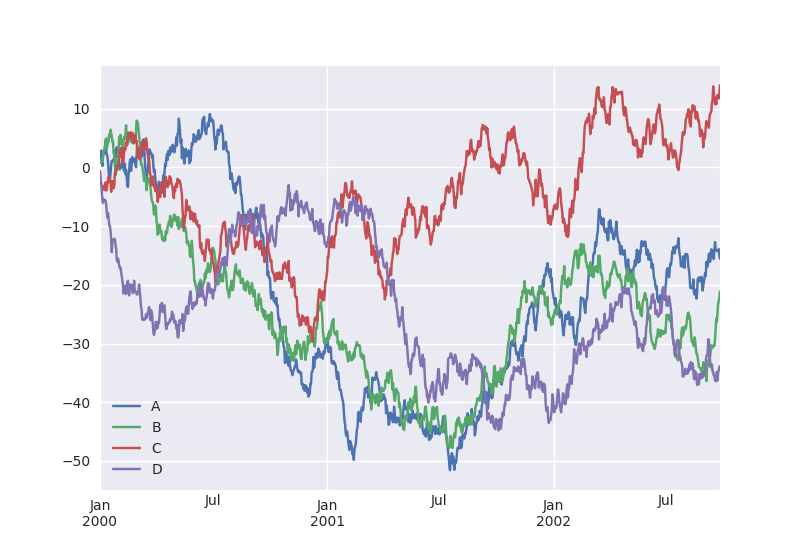

In [14]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns

In [50]:
from IPython.display import Math as latexmath
from IPython.display import IFrame

* 6 Tip mounted Turbojets + 1 turboshaft in tail to power tail rotor
* 3 rotors with diameter of 120m
* Empty weight 200,000kg
* Gross weight 453,000kg
* 60 rpm (according to Jay Spensers book Vertical Challenge. The Hiller Aircraft Story from Jay P. Spenser. ISBN 0-295-97203-3 and also the Air Tug video)
* Circumference = 383.02m
so tips are 383m/s
sea level speed of sound is 344 m/s
Tips are supersonic...

$$ 
Takeoff\; Gross\; Weight = W_0 \\
Blade\; Position(Azimuth\; Angle)\; = \psi \\ 
Rotor\; Tip\; Speed\; (Hovering\; Flight)\; = V_{tip(HF)}\\
Rotor\; Tip\; Speed\; (Forward\; Flight)\; = V_{tip(FF)}\\
Freestream\; Air\; Speed\; = V_{\infty}\\
Rotor\; Rotation\; Frequency\; = \Omega\\
Rotor\; Radius\; = R_R\\
Rotor\; Hub\; Radius\; = R_H\\
Rotor\; Thrust\; = T\\
Rotor\; Thrust\; Coefficient\; = C_T\\
Rotor\; Disk\; Area\; = A\\
Air\; Density\; = \rho\\
Rotor\; Disk\; Power\; Loading\; = PL\\
Rotor\; Disk\; Loading\; = DL\\
$$

In [87]:
latexmath('V_{tip(HF)} = R_R\Omega')

<IPython.core.display.Math object>

In [ ]:
def hover_flight_tip_speed(rotor_radius, rotor_frequency):
    return rotor_radius*rotor_frequency

In [86]:
latexmath('V_{tip(FF)} = R_R\Omega + V_{\infty} \sin \psi')

<IPython.core.display.Math object>

In [89]:
def forward_flight_tip_speed(freestream_airspeed,blade_azimuth_angle,rotor_radius, rotor_frequency):
    return (rotor_radius*rotor_frequency)+(freestream_airspeed*np.sin(blade_azimuth_angle))

In [85]:
latexmath('A = \pi R_R^2')

<IPython.core.display.Math object>

In [ ]:
def rotor_disk_area(rotor_radius):
    return np.pi*rotor_radius**2

In [84]:
latexmath(r'C_T = \frac{T}{A R_R^2 \Omega^2 \rho}')

<IPython.core.display.Math object>

In [ ]:
def rotor_thrust_coefficent(rotor_thrust,rotor_area, rotor_radius, rotor_frequency, air_density):
    return rotor_thrust/(air_density*rotor_area*(rotor_frequency**2)*(rotor_radius**2))

In [58]:
IFrame('https://upload.wikimedia.org/wikipedia/commons/e/e5/VTOL_DiscLoad-LiftEfficiency.svg',width=450,height=450)

In [96]:
airspeed = np.linspace(0, 150, 151)
rotor_frequency = 1
rotor_radius = 60
blade_azimuth_angles = np.linspace(0, 2*np.pi, 20)
tip_speed_matrix = [forward_flight_tip_speed(a ,blade_azimuth_angles,rotor_radius, rotor_frequency) for a in airspeed]



print(tip_speed_matrix)

[array([ 60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,
        60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.,  60.]), array([ 60.        ,  60.32469947,  60.61421271,  60.83716648,
        60.96940027,  60.99658449,  60.91577333,  60.73572391,
        60.47594739,  60.16459459,  59.83540541,  59.52405261,
        59.26427609,  59.08422667,  59.00341551,  59.03059973,
        59.16283352,  59.38578729,  59.67530053,  60.        ]), array([ 60.        ,  60.64939894,  61.22842543,  61.67433296,
        61.93880053,  61.99316899,  61.83154665,  61.47144782,
        60.95189479,  60.32918918,  59.67081082,  59.04810521,
        58.52855218,  58.16845335,  58.00683101,  58.06119947,
        58.32566704,  58.77157457,  59.35060106,  60.        ]), array([ 60.        ,  60.97409841,  61.84263814,  62.51149943,
        62.9082008 ,  62.98975348,  62.74731998,  62.20717173,
        61.42784218,  60.49378377,  59.50621623,  58.57215782,
        57.79282827,  57.25268002,  57.0